# PROJET 3: Anticipez les besoins en consommation électrique de bâtiments

# Partie 3: Modélisation

##### Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


##### Import fichier

In [82]:
data=pd.read_csv('DataSetProcessing.csv',error_bad_lines=True,low_memory=False)
df=pd.DataFrame(data)


In [83]:
##### Préparation du training et test set

In [84]:
variablescibles=['TotalGHGEmissions','SiteEnergyUse(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','OtherFuelUse(kBtu)']


In [85]:
y=df['SiteEnergyUse(kBtu)'].values
X=df.drop(variablescibles,axis=1)


Nous allons splitter les données en test et train

In [86]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.3)

In [87]:
##### Test de différents modèles de régression

Nous allons voir comment différents modèles de régression fonctionnent puis en choisir une partie pour optimiser les hyperparamètres

In [88]:
listtest=[]
listerror=[]

In [89]:
##### Régression linéaire simple

In [90]:
from sklearn import linear_model
import numpy as np

# On crée un modèle de régression linéaire
lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train,y_train)

# On utilise la MAE pour comparer l'erreur
baseline_error = (np.mean(np.abs(lr.predict(X_test) - y_test)))

listtest.append('Linear')
listerror.append(baseline_error)
print(baseline_error)


0.3937600349604143


In [91]:
##### Régression Ridge

In [92]:
from sklearn.linear_model import Ridge
ridge = linear_model.RidgeCV()
ridge.fit(X_train,y_train)

# On utilise la MAE pour comparer l'erreur
baseline_error = (np.mean(np.abs(ridge.predict(X_test) - y_test)))

listtest.append('Ridge')
listerror.append(baseline_error)
print(baseline_error)

0.39350456740890416


In [93]:
##### LassoCV

In [94]:
from sklearn.linear_model import LassoCV
# On crée un modèle de régression linéaire
lasso = LassoCV()

# On entraîne ce modèle sur les données d'entrainement
lasso.fit(X_train,y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
baseline_error = (np.mean(np.abs(lasso.predict(X_test) - y_test)))
listtest.append('Lasso')
listerror.append(baseline_error)
print(baseline_error)


0.4132033987628275


In [58]:
##### ElasticCV

In [59]:
from sklearn.linear_model import ElasticNetCV
# On crée un modèle de régression linéaire
net = ElasticNetCV()

# On entraîne ce modèle sur les données d'entrainement
net.fit(X_train,y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
baseline_error = (np.mean(np.abs(net.predict(X_test) - y_test)))
listtest.append('Elastic')
listerror.append(baseline_error)

print(baseline_error)

0.2737952447511235


In [60]:
##### Bagging

In [61]:
from sklearn.ensemble import BaggingRegressor
regr = BaggingRegressor()

regr.fit(X_train, y_train)

baseline_error = (np.mean(np.abs(regr.predict(X_test) - y_test)))

listtest.append('Bagging')
listerror.append(baseline_error)
print(baseline_error)


0.2870007124025079


In [62]:
##### GradientBoost

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

grad= GradientBoostingRegressor(n_estimators=100, random_state=10)

grad.fit(X_train, y_train)

baseline_error = np.mean(np.abs((grad.predict(X_test) - y_test)))
listtest.append('GradientBoost')
listerror.append(baseline_error)
print(baseline_error)

0.26765933666804603


In [64]:
##### xgboost

In [65]:
import xgboost as xgb
xgboost= xgb.XGBRegressor(objective="reg:squarederror")

xgboost.fit(X_train, y_train)

baseline_error = np.mean(np.abs((xgboost.predict(X_test) - y_test)))
listtest.append('Xgboost')
listerror.append(baseline_error)
print(baseline_error)


0.29227794316352074


In [66]:
###### random forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
randtree= RandomForestRegressor()

randtree.fit(X_train, y_train)

baseline_error = np.mean(np.abs((randtree.predict(X_test) - y_test)))
listtest.append('Randomforest')
listerror.append(baseline_error)

print(baseline_error)

0.2719048469459751


In [68]:
##### Extratrees

In [69]:
from sklearn.ensemble import ExtraTreesRegressor
extra= ExtraTreesRegressor()

extra.fit(X_train, y_train)

baseline_error = np.mean(np.abs((extra.predict(X_test) - y_test)))
listtest.append('ExtraTrees')
listerror.append(baseline_error)

print(baseline_error)

0.2899548465942916


In [70]:
##### DecisionTrees

In [71]:
from sklearn.tree import DecisionTreeRegressor
decision= DecisionTreeRegressor()

decision.fit(X_train, y_train)

baseline_error = np.mean(np.abs((decision.predict(X_test) - y_test)))
listtest.append('DecisionTrees')
listerror.append(baseline_error)

print(baseline_error)

0.38310107025220974


In [72]:
##### Perceptron à couches

In [73]:
from sklearn.neural_network import MLPRegressor
perceptron= MLPRegressor(learning_rate='adaptive',learning_rate_init=0.001,max_iter=1000)

perceptron.fit(X_train, y_train)

baseline_error = np.mean(np.abs((perceptron.predict(X_test) - y_test)))
listtest.append('Perceptron')
listerror.append(baseline_error)

print(baseline_error)

0.2771867946584837


In [74]:
##### Comparaison des MAE

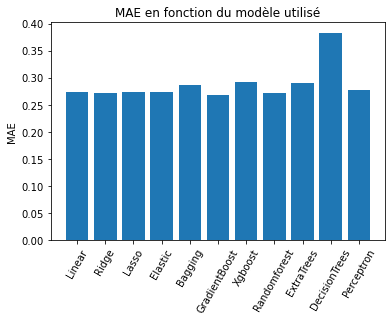

In [75]:
fig, ax = plt.subplots()
plt.bar(listtest,listerror)
plt.xticks(rotation=60)
plt.ylabel('MAE')
plt.title('MAE en fonction du modèle utilisé')
plt.show()

In [76]:
##### Optimisation de paramètres

Nous allons choisir les modèles suivants pour effectuer des CV:
    * Ridge
    * GradientBoost 
    * ExtraTrees

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
##### Gradientboost

In [79]:
estimators=np.logspace(1,3.5,8)
estimators=[int(i) for i in estimators]

In [80]:
learningrate=np.logspace(-3,-0.3,7)

In [81]:
param_grid = {'learning_rate':learningrate, 
              'n_estimators':estimators}

grad=GradientBoostingRegressor()
search=GridSearchCV(grad,param_grid,cv=5)
search.fit(X,y)             
              

KeyboardInterrupt: 

In [ ]:
search.best_params_

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

grad= GradientBoostingRegressor(n_estimators=1389, learning_rate=0.022, max_depth=3)

grad.fit(X_train, y_train)
y_pred = grad.predict(X_test)
baseline_error = np.mean(np.abs((grad.predict(X_test) - y_test)))
listtest.append('GradientBoost')
listerror.append(baseline_error)
print(baseline_error)

In [ ]:
listbis=[]
listbisappend=[]
for i in estimators:
    grad= GradientBoostingRegressor(n_estimators=int(np.floor(i)), learning_rate=0.022, max_depth=3)
    grad.fit(X_train, y_train)
    y_pred = grad.predict(X_test)
    baseline_error = np.mean(np.abs((grad.predict(X_test) - y_test)))
    listbis.append(np.floor(i))
    listbisappend.append(baseline_error)
    

In [ ]:
fig, ax = plt.subplots()
plt.plot(listbis,listbisappend)
plt.ylabel('MAE')
plt.title('MAE as a function of the number of estimators')
plt.show()

In [156]:
listbis=[]
listbisappend=[]
for i in learningrate:
    grad= GradientBoostingRegressor(n_estimators=1389, learning_rate=i, max_depth=3)
    grad.fit(X_train, y_train)
    y_pred = grad.predict(X_test)
    baseline_error = np.mean(np.abs((grad.predict(X_test) - y_test)))
    listbis.append(i)
    listbisappend.append(baseline_error)

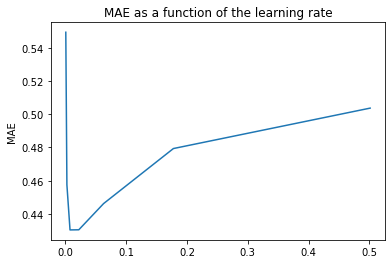

In [157]:
fig, ax = plt.subplots()
plt.plot(listbis,listbisappend)
plt.ylabel('MAE')
plt.title('MAE as a function of the learning rate')
plt.show()

In [155]:
listbis

[array([0.001     , 0.00281838, 0.00794328, 0.02238721, 0.06309573,
        0.17782794, 0.50118723]),
 array([0.001     , 0.00281838, 0.00794328, 0.02238721, 0.06309573,
        0.17782794, 0.50118723]),
 array([0.001     , 0.00281838, 0.00794328, 0.02238721, 0.06309573,
        0.17782794, 0.50118723]),
 array([0.001     , 0.00281838, 0.00794328, 0.02238721, 0.06309573,
        0.17782794, 0.50118723]),
 array([0.001     , 0.00281838, 0.00794328, 0.02238721, 0.06309573,
        0.17782794, 0.50118723]),
 array([0.001     , 0.00281838, 0.00794328, 0.02238721, 0.06309573,
        0.17782794, 0.50118723]),
 array([0.001     , 0.00281838, 0.00794328, 0.02238721, 0.06309573,
        0.17782794, 0.50118723])]

In [ ]:
##### RandomForest

In [174]:
depth=[5,10, 20, 30, 40,60]
features=[2,5,10, 20, 30]
leaf=[1, 2, 4,10,20,40]

In [162]:
param_grid = {'max_depth': depth,
     'min_samples_leaf': [1, 2, 4],
     'n_estimators': [200, 400, 600, 800]}

rand=RandomForestRegressor()
search=GridSearchCV(rand,param_grid,cv=5)
search.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20, 30, 40, 60],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [200, 400, 600, 800]})

In [163]:
search.best_params_

{'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 800}

In [165]:

rand=RandomForestRegressor(max_depth= 10, min_samples_leaf= 4, n_estimators= 800)

rand.fit(X_train, y_train)

baseline_error = np.mean(np.abs((rand.predict(X_test) - y_test)))
listtest.append('GradientBoost')
listerror.append(baseline_error)
print(baseline_error)

0.4269431571613209


In [166]:
listbis=[]
listbisappend=[]
for i in estimators:
    grad= GradientBoostingRegressor(n_estimators=int(np.floor(i)), learning_rate=0.05, max_depth=3)
    grad.fit(X_train, y_train)
    y_pred = grad.predict(X_test)
    baseline_error = np.mean(np.abs((grad.predict(X_test) - y_test)))
    listbis.append(np.floor(i))
    listbisappend.append(baseline_error)

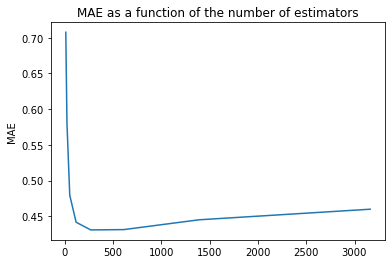

In [167]:
fig, ax = plt.subplots()
plt.plot(listbis,listbisappend)
plt.ylabel('MAE')
plt.title('MAE as a function of the number of estimators')
plt.show()

In [169]:
listbis=[]
listbisappend=[]
for i in depth:
    grad= GradientBoostingRegressor(n_estimators=800, max_depth=i)
    grad.fit(X_train, y_train)
    y_pred = grad.predict(X_test)
    baseline_error = np.mean(np.abs((grad.predict(X_test) - y_test)))
    listbis.append(i)
    listbisappend.append(baseline_error)

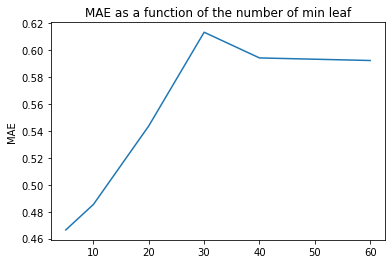

In [170]:
fig, ax = plt.subplots()
plt.plot(listbis,listbisappend)
plt.ylabel('MAE')
plt.title('MAE as a function of the number of min leaf')
plt.show()

In [171]:
listbis=[]
listbisappend=[]
for i in leaf:
    grad= GradientBoostingRegressor(min_samples_leaf=i)
    grad.fit(X_train, y_train)
    y_pred = grad.predict(X_test)
    baseline_error = np.mean(np.abs((grad.predict(X_test) - y_test)))
    listbis.append(i)
    listbisappend.append(baseline_error)

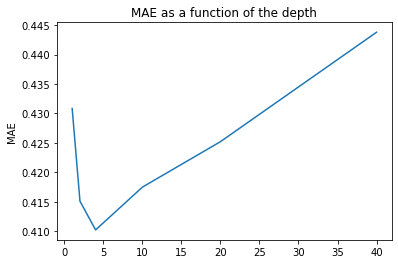

In [172]:
fig, ax = plt.subplots()
plt.plot(listbis,listbisappend)
plt.ylabel('MAE')
plt.title('MAE as a function of the depth')
plt.show()

In [175]:
listbis=[]
listbisappend=[]
for i in features:
    grad= GradientBoostingRegressor(max_features=i)
    grad.fit(X_train, y_train)
    y_pred = grad.predict(X_test)
    baseline_error = np.mean(np.abs((grad.predict(X_test) - y_test)))
    listbis.append(i)
    listbisappend.append(baseline_error)

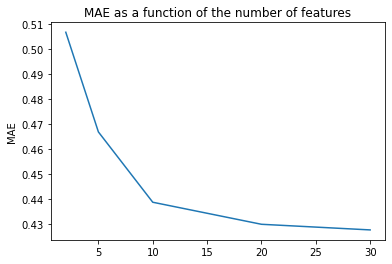

In [176]:
fig, ax = plt.subplots()
plt.plot(listbis,listbisappend)
plt.ylabel('MAE')
plt.title('MAE as a function of the number of features')
plt.show()

In [ ]:
##### Ridge

In [ ]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

In [178]:
param_grid = {'alpha': alphas}

ridge=linear_model.Ridge()
search=GridSearchCV(ridge,param_grid,cv=5)
search.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-05, 1.12266777e-05, 1.26038293e-05, 1.41499130e-05,
       1.58856513e-05, 1.78343088e-05, 2.00220037e-05, 2.24780583e-05,
       2.52353917e-05, 2.83309610e-05, 3.18062569e-05, 3.57078596e-05,
       4.00880633e-05, 4.50055768e-05, 5.05263107e-05, 5.67242607e-05,
       6.36824994e-05, 7.14942899e-05, 8.02643352e-05, 9....
       6.98587975e+03, 7.84282206e+03, 8.80488358e+03, 9.88495905e+03,
       1.10975250e+04, 1.24588336e+04, 1.39871310e+04, 1.57029012e+04,
       1.76291412e+04, 1.97916687e+04, 2.22194686e+04, 2.49450814e+04,
       2.80050389e+04, 3.14403547e+04, 3.52970730e+04, 3.96268864e+04,
       4.44878283e+04, 4.99450512e+04, 5.60716994e+04, 6.29498899e+04,
       7.06718127e+04, 7.93409667e+04, 8.90735464e+04, 1.00000000e+05])})

In [179]:
search.best_params_

{'alpha': 3.3700643292719317}

In [36]:
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean(np.abs((ridge.predict(X_test) - y_test)))])

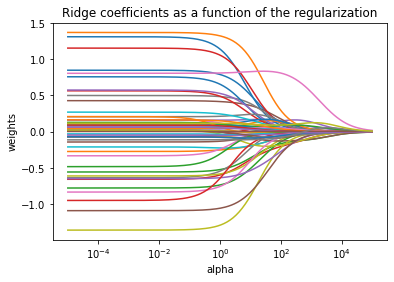

In [37]:
import matplotlib.pyplot as plt

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


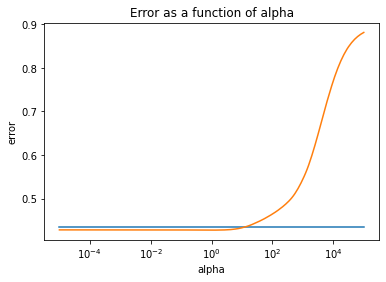

In [42]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Error as a function of alpha')
plt.axis('tight')
plt.show()